In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


# <b><i>LOADING REQUIRED LIBRARIES

In [2]:
df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/9_OUTLIER_HANDLING_numcols.csv")
df.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE1
0,0,100002,1,0,1,1,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,8
1,1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.5,8
4,4,100007,0,0,1,1,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [31]:
no_of_unique=[]
for i in df.columns:
  no_of_unique.append(df[i].nunique())

set(no_of_unique)

{2,
 3,
 4,
 5,
 6,
 7,
 11,
 12,
 14,
 17,
 18,
 24,
 27,
 32,
 36,
 51,
 59,
 81,
 1001,
 2209,
 5594,
 6165,
 11757,
 13649,
 15677,
 17455,
 43808,
 119890,
 269288,
 303947}

In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

# <i><b> UNIQUE VALUES = 2

In [4]:
cols_with2=df.columns[df.nunique() == 2].tolist()

In [5]:
len(cols_with2)

36

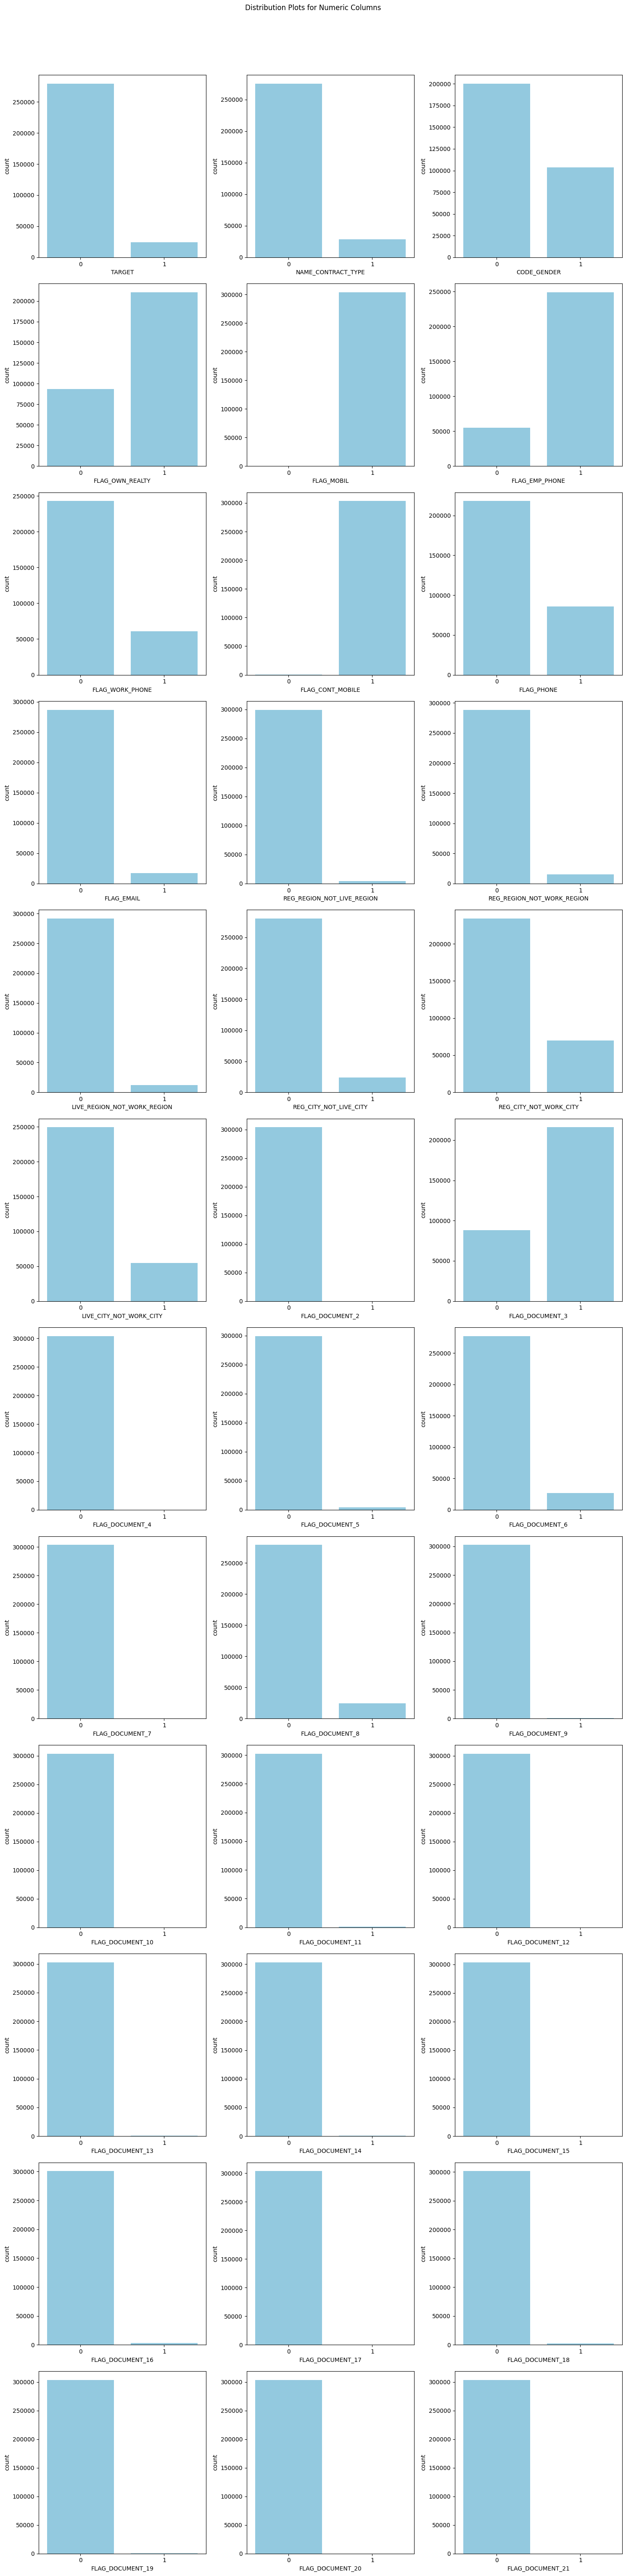

In [6]:
import math
num_columns = df[cols_with2].shape[1]
num_rows = math.ceil(num_columns / 3)
num_cols = min(num_columns, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()
for i, column in enumerate(cols_with2):
    sns.countplot(data=df, x=column,ax=axes[i], color='skyblue')
plt.suptitle('Distribution Plots for Numeric Columns', y=1.02)
plt.tight_layout()
plt.show()

In [7]:
# columns to be dropped

columns_to_be_dropped=["FLAG_MOBIL","FLAG_CONT_MOBILE","FLAG_EMAIL",
"REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION",
"LIVE_REGION_NOT_WORK_REGION",
"FLAG_DOCUMENT_2",
"FLAG_DOCUMENT_4",
"FLAG_DOCUMENT_5",
"FLAG_DOCUMENT_7",
"FLAG_DOCUMENT_9",
"FLAG_DOCUMENT_10",
"FLAG_DOCUMENT_11",
"FLAG_DOCUMENT_12",
"FLAG_DOCUMENT_13",
"FLAG_DOCUMENT_14",
"FLAG_DOCUMENT_15",
"FLAG_DOCUMENT_16",
"FLAG_DOCUMENT_17",
"FLAG_DOCUMENT_18",
"FLAG_DOCUMENT_19",
"FLAG_DOCUMENT_20",
"FLAG_DOCUMENT_21"]

df[columns_to_be_dropped]

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,FLAG_DOCUMENT_2,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_7,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303942,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303943,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303944,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303945,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(df[['FLAG_MOBIL']], df['TARGET'], discrete_features=True)>0.25

array([False])

In [9]:
mutual_info=pd.DataFrame()
mutual_info["columns"]=columns_to_be_dropped
mutual_info["Mutual_info"]=[mutual_info_classif(df[[i]], df['TARGET'], discrete_features=True) for i in columns_to_be_dropped]

In [10]:
mutual_info

,columns,Mutual_info
0,FLAG_MOBIL,[2.768633286627726e-07]
1,FLAG_CONT_MOBILE,[3.951848025012493e-08]
2,FLAG_EMAIL,[1.094736360725962e-06]
3,REG_REGION_NOT_LIVE_REGION,[1.3326142328119045e-05]
4,REG_REGION_NOT_WORK_REGION,[2.2113965567342048e-05]
5,LIVE_REGION_NOT_WORK_REGION,[3.7810942251602364e-06]
6,FLAG_DOCUMENT_2,[9.215677879733926e-06]
7,FLAG_DOCUMENT_4,[6.921868299026982e-06]
8,FLAG_DOCUMENT_5,[3.074249721110589e-09]
9,FLAG_DOCUMENT_7,[2.6636551066729812e-06]


In [11]:
mutual_info['Mutual_info'].max()<0.05

# THESE VALUES ARE VERY LESS WITH RESPECT TO TARGET VARIABLE SO WE ARE DROPPING THESE COLUMNS

array([ True])

In [12]:
df=df.drop(columns=columns_to_be_dropped)

In [13]:
cols_with2=df.columns[df.nunique() == 2].tolist()
cols_with2

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8']

#<b><i> UNIQUE VALUES =3

In [14]:
cols_with3=df.columns[df.nunique() == 3].tolist()
cols_with3

['NAME_TYPE_SUITE',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE']

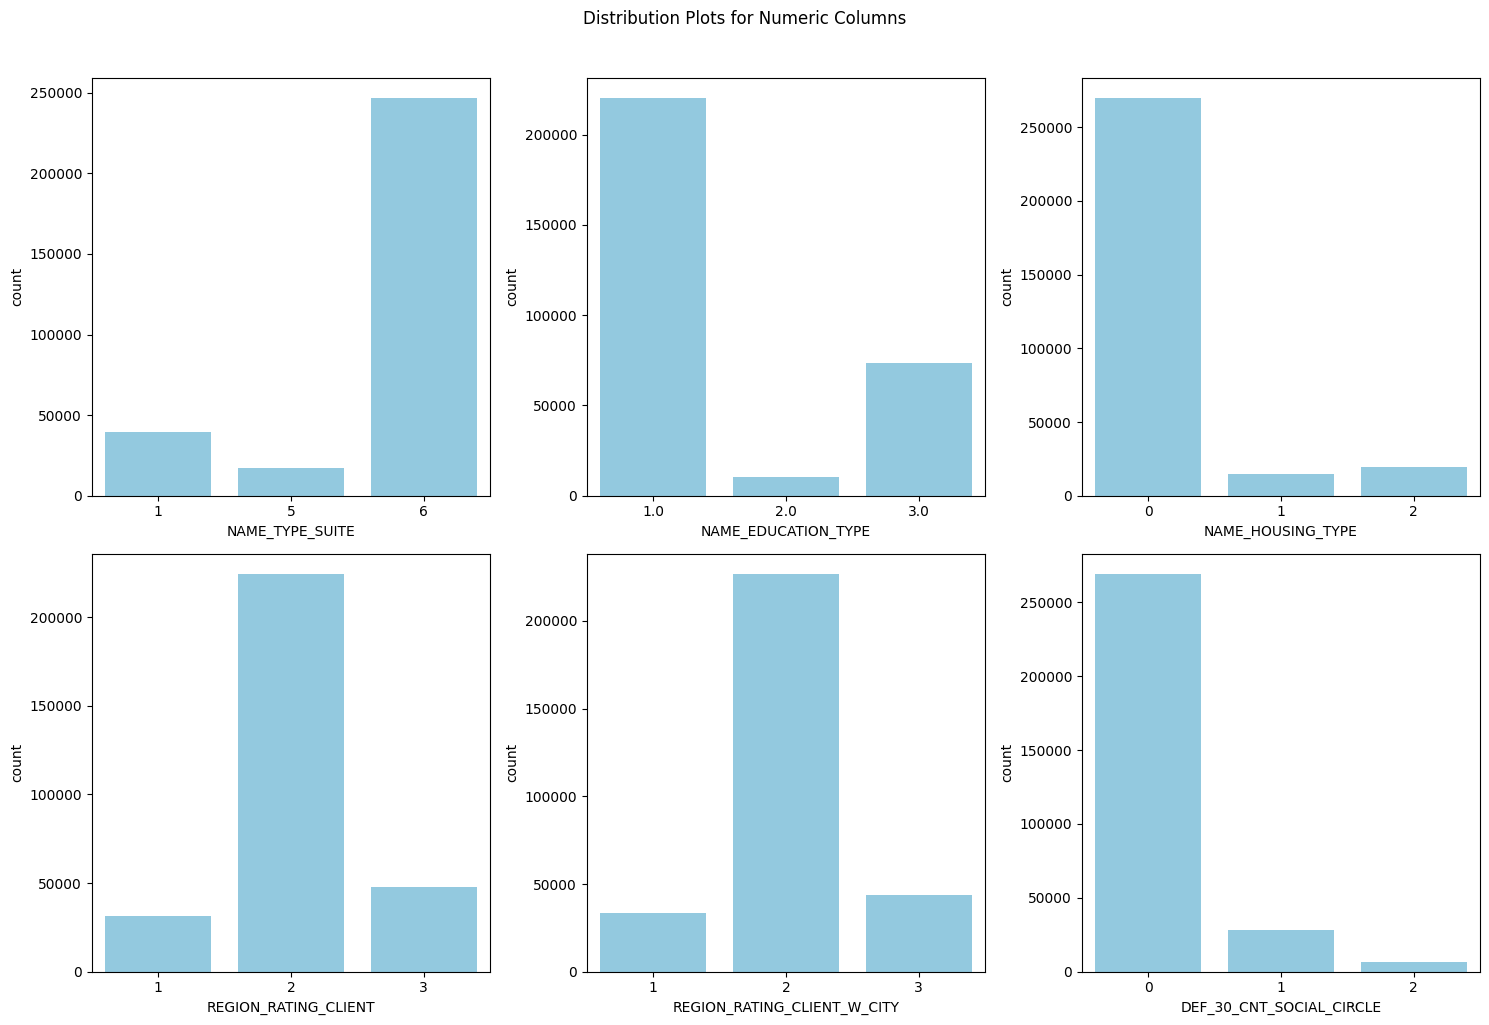

In [15]:
import math
num_columns = df[cols_with3].shape[1]
num_rows = math.ceil(num_columns / 3)
num_cols = min(num_columns, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()
for i, column in enumerate(cols_with3):
    sns.countplot(data=df, x=column,ax=axes[i], color='skyblue')
plt.suptitle('Distribution Plots for Numeric Columns', y=1.02)
plt.tight_layout()
plt.show()

<u>Null Hypothesis</u> <br>
The null hypothesis assumes that there is no association or independence between the categorical variables being tested.

<u>Alternative Hypothesis</u><br>
The alternative hypothesis challenges the null hypothesis, suggesting that there is a significant association or dependence between the categorical variables.

In [16]:
import pandas as pd
from scipy.stats import chi2_contingency

In [17]:
cols_with3

['NAME_TYPE_SUITE',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE']

## <ul> 'CHI2 CONTINGENCY TEST'

In [20]:
if p < 0.05:
    print("Reject the null hypothesis: Category_Input is dependent on Category_Output")
else:
    print("Fail to reject the null hypothesis: Category_Input is independent of Category_Output")

Fail to reject the null hypothesis: Category_Input is independent of Category_Output


In [21]:
chi2_info=pd.DataFrame()
chi2_info["columns"]=cols_with3
chi2_info["pvalue"]=[chi2_contingency(pd.crosstab(df[i], df['TARGET'])).pvalue for i in cols_with3]

In [23]:
chi2_info["dep/indep"]=["dependent" if i<0.05 else "independent" for i in chi2_info["pvalue"]]

In [24]:
chi2_info

,columns,pvalue,dep/indep
0,NAME_TYPE_SUITE,2.513345e-05,dependent
1,NAME_EDUCATION_TYPE,1.342617e-210,dependent
2,NAME_HOUSING_TYPE,3.200882e-71,dependent
3,REGION_RATING_CLIENT,2.167330e-232,dependent
4,REGION_RATING_CLIENT_W_CITY,1.174315e-248,dependent
5,DEF_30_CNT_SOCIAL_CIRCLE,7.985520e-01,independent


In [43]:
df=df.drop("DEF_30_CNT_SOCIAL_CIRCLE",axis=1)

KeyError: "['DEF_30_CNT_SOCIAL_CIRCLE'] not found in axis"

# <b><i> UNIQUE VALUES = 4

In [26]:
cols_with3=df.columns[df.nunique() == 4].tolist()
cols_with3

['CNT_CHILDREN', 'NAME_INCOME_TYPE']

In [27]:
chi2_info=pd.DataFrame()
chi2_info["columns"]=cols_with3
chi2_info["pvalue"]=[chi2_contingency(pd.crosstab(df[i], df['TARGET'])).pvalue for i in cols_with3]

In [28]:
chi2_info["dep/indep"]=["dependent" if i<0.05 else "independent" for i in chi2_info["pvalue"]]

In [29]:
chi2_info

,columns,pvalue,dep/indep
0,CNT_CHILDREN,2.759936e-29,dependent
1,NAME_INCOME_TYPE,3.654640e-261,dependent


# <b><i>UNIQUE VALUES 5-20

In [33]:
selected_columns = [column for column in df.columns if 5 <= df[column].nunique() <= 20]

# Display the selected column names
print("Column names with unique values between 5 and 20:")
print(selected_columns)

Column names with unique values between 11 and 81:
['NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT', 'OCCUPATION_TYPE1']


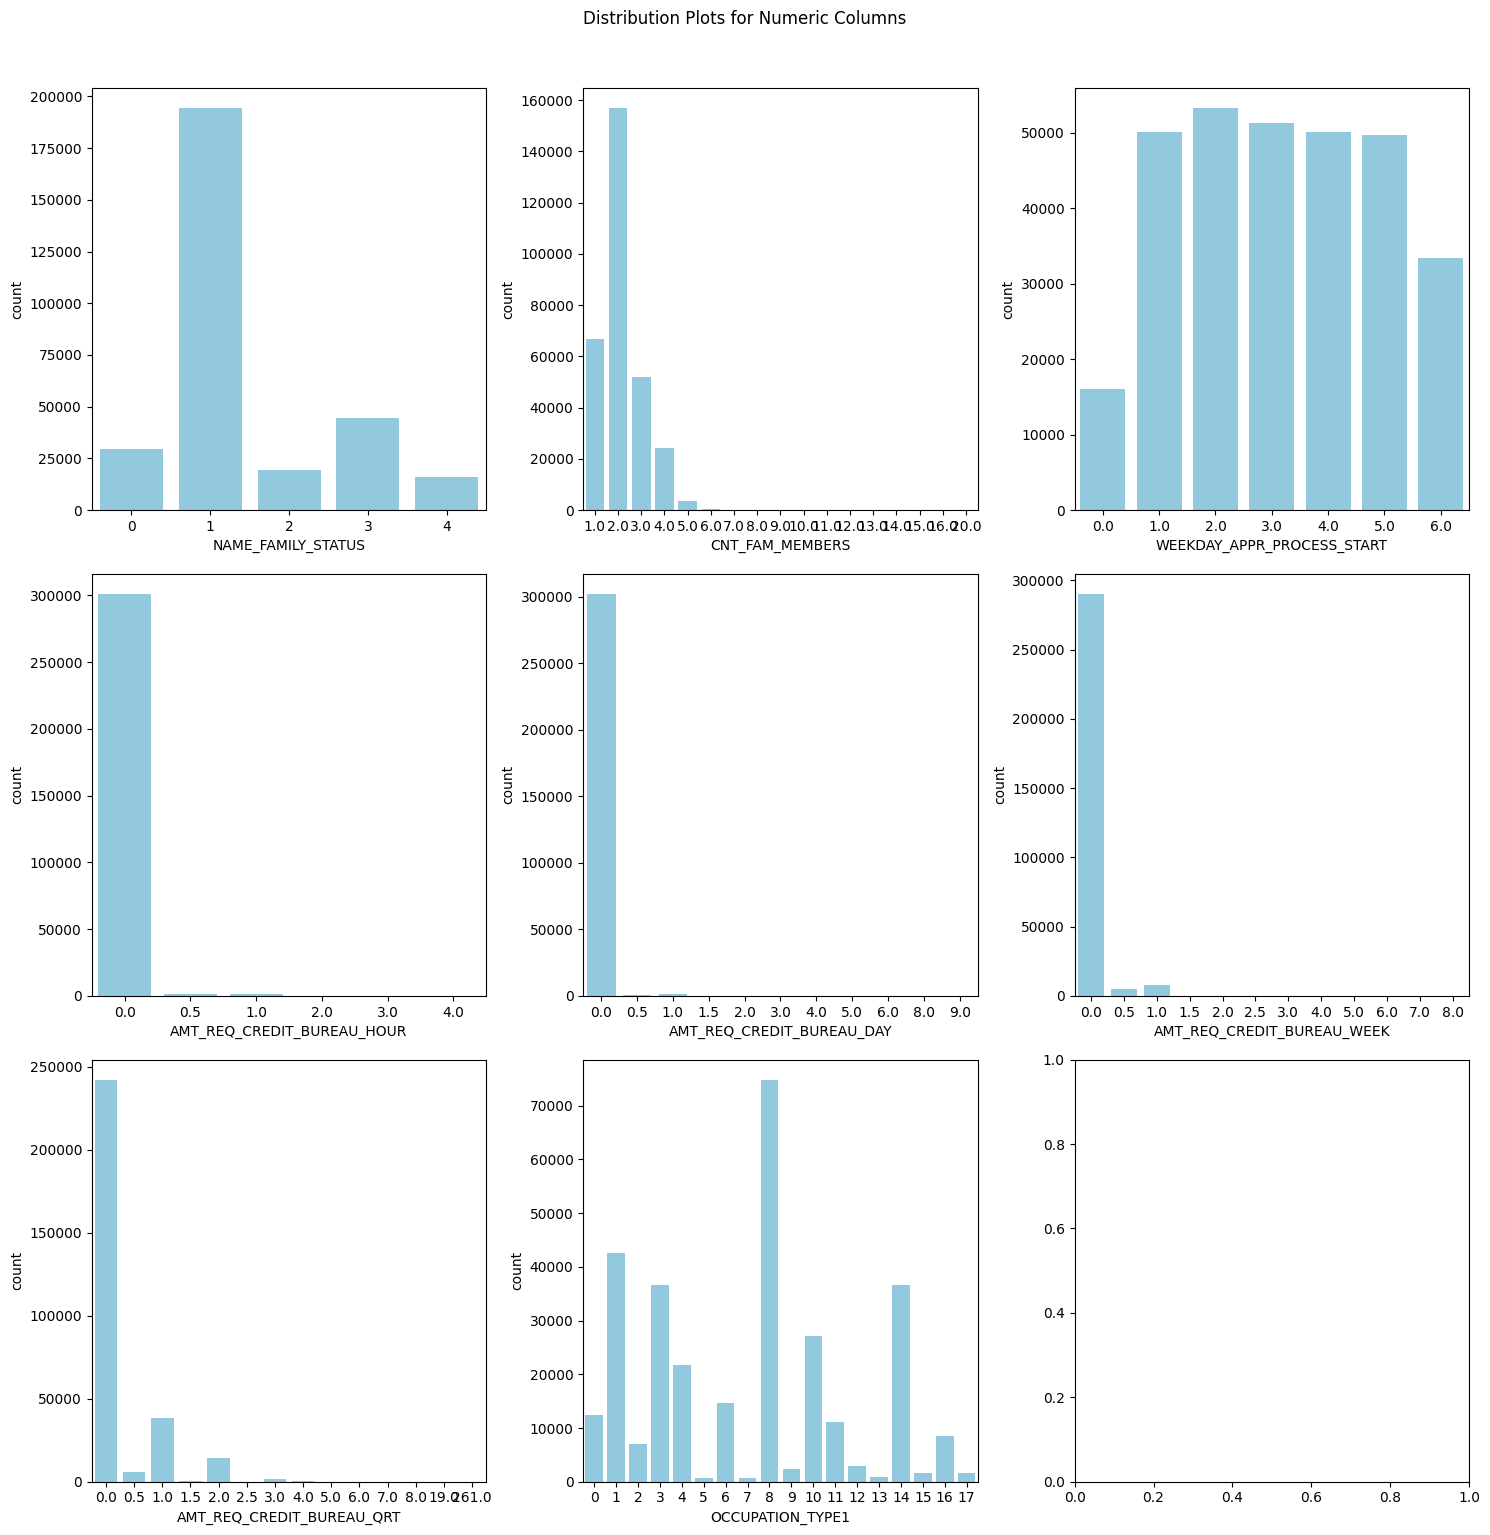

In [41]:
import math
num_columns = df[selected_columns].shape[1]
num_rows = math.ceil(num_columns / 3)
num_cols = min(num_columns, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()
for i, column in enumerate(selected_columns):
    sns.countplot(data=df, x=column,ax=axes[i], color='skyblue')
plt.suptitle('Distribution Plots for Numeric Columns', y=1.02)
plt.tight_layout()
plt.show()

In [39]:
df[selected_columns].head()

,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_QRT,OCCUPATION_TYPE1
0,3,1.0,3.0,0.0,0.0,0.0,0.0,8
1,1,2.0,1.0,0.0,0.0,0.0,0.0,3
2,3,1.0,1.0,0.0,0.0,0.0,0.0,8
3,0,2.0,3.0,0.0,0.0,0.0,0.0,8
4,3,1.0,4.0,0.0,0.0,0.0,0.0,3


In [ ]:
# I am considering 5-20 as categories only

In [35]:
chi2_info=pd.DataFrame()
chi2_info["columns"]=selected_columns
chi2_info["pvalue"]=[chi2_contingency(pd.crosstab(df[i], df['TARGET'])).pvalue for i in selected_columns]

In [37]:
chi2_info["dep/indep"]=["dependent" if i<0.05 else "independent" for i in chi2_info["pvalue"]]

In [38]:
chi2_info

,columns,pvalue,dep/indep
0,NAME_FAMILY_STATUS,6.733571e-106,dependent
1,CNT_FAM_MEMBERS,8.887506e-27,dependent
2,WEEKDAY_APPR_PROCESS_START,2.510563e-02,dependent
3,AMT_REQ_CREDIT_BUREAU_HOUR,8.981927e-04,dependent
4,AMT_REQ_CREDIT_BUREAU_DAY,1.203429e-01,independent
5,AMT_REQ_CREDIT_BUREAU_WEEK,3.999404e-09,dependent
6,AMT_REQ_CREDIT_BUREAU_QRT,4.799235e-25,dependent
7,OCCUPATION_TYPE1,0.000000e+00,dependent


In [42]:
df.drop("AMT_REQ_CREDIT_BUREAU_DAY",axis=1,inplace=True)

# <i><b>CHECKING THE AMOUNT OF VARIATION IN EACH OF THE NUMERICAL COLUMNS

In [44]:
selected_columns = [column for column in df.columns if 21 <= df[column].nunique() <= 307292]

# Display the selected column names
print("Column names with unique values between 11 and 81:")
print(selected_columns)

Column names with unique values between 11 and 81:
['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [46]:
df[selected_columns].shape[1]

19

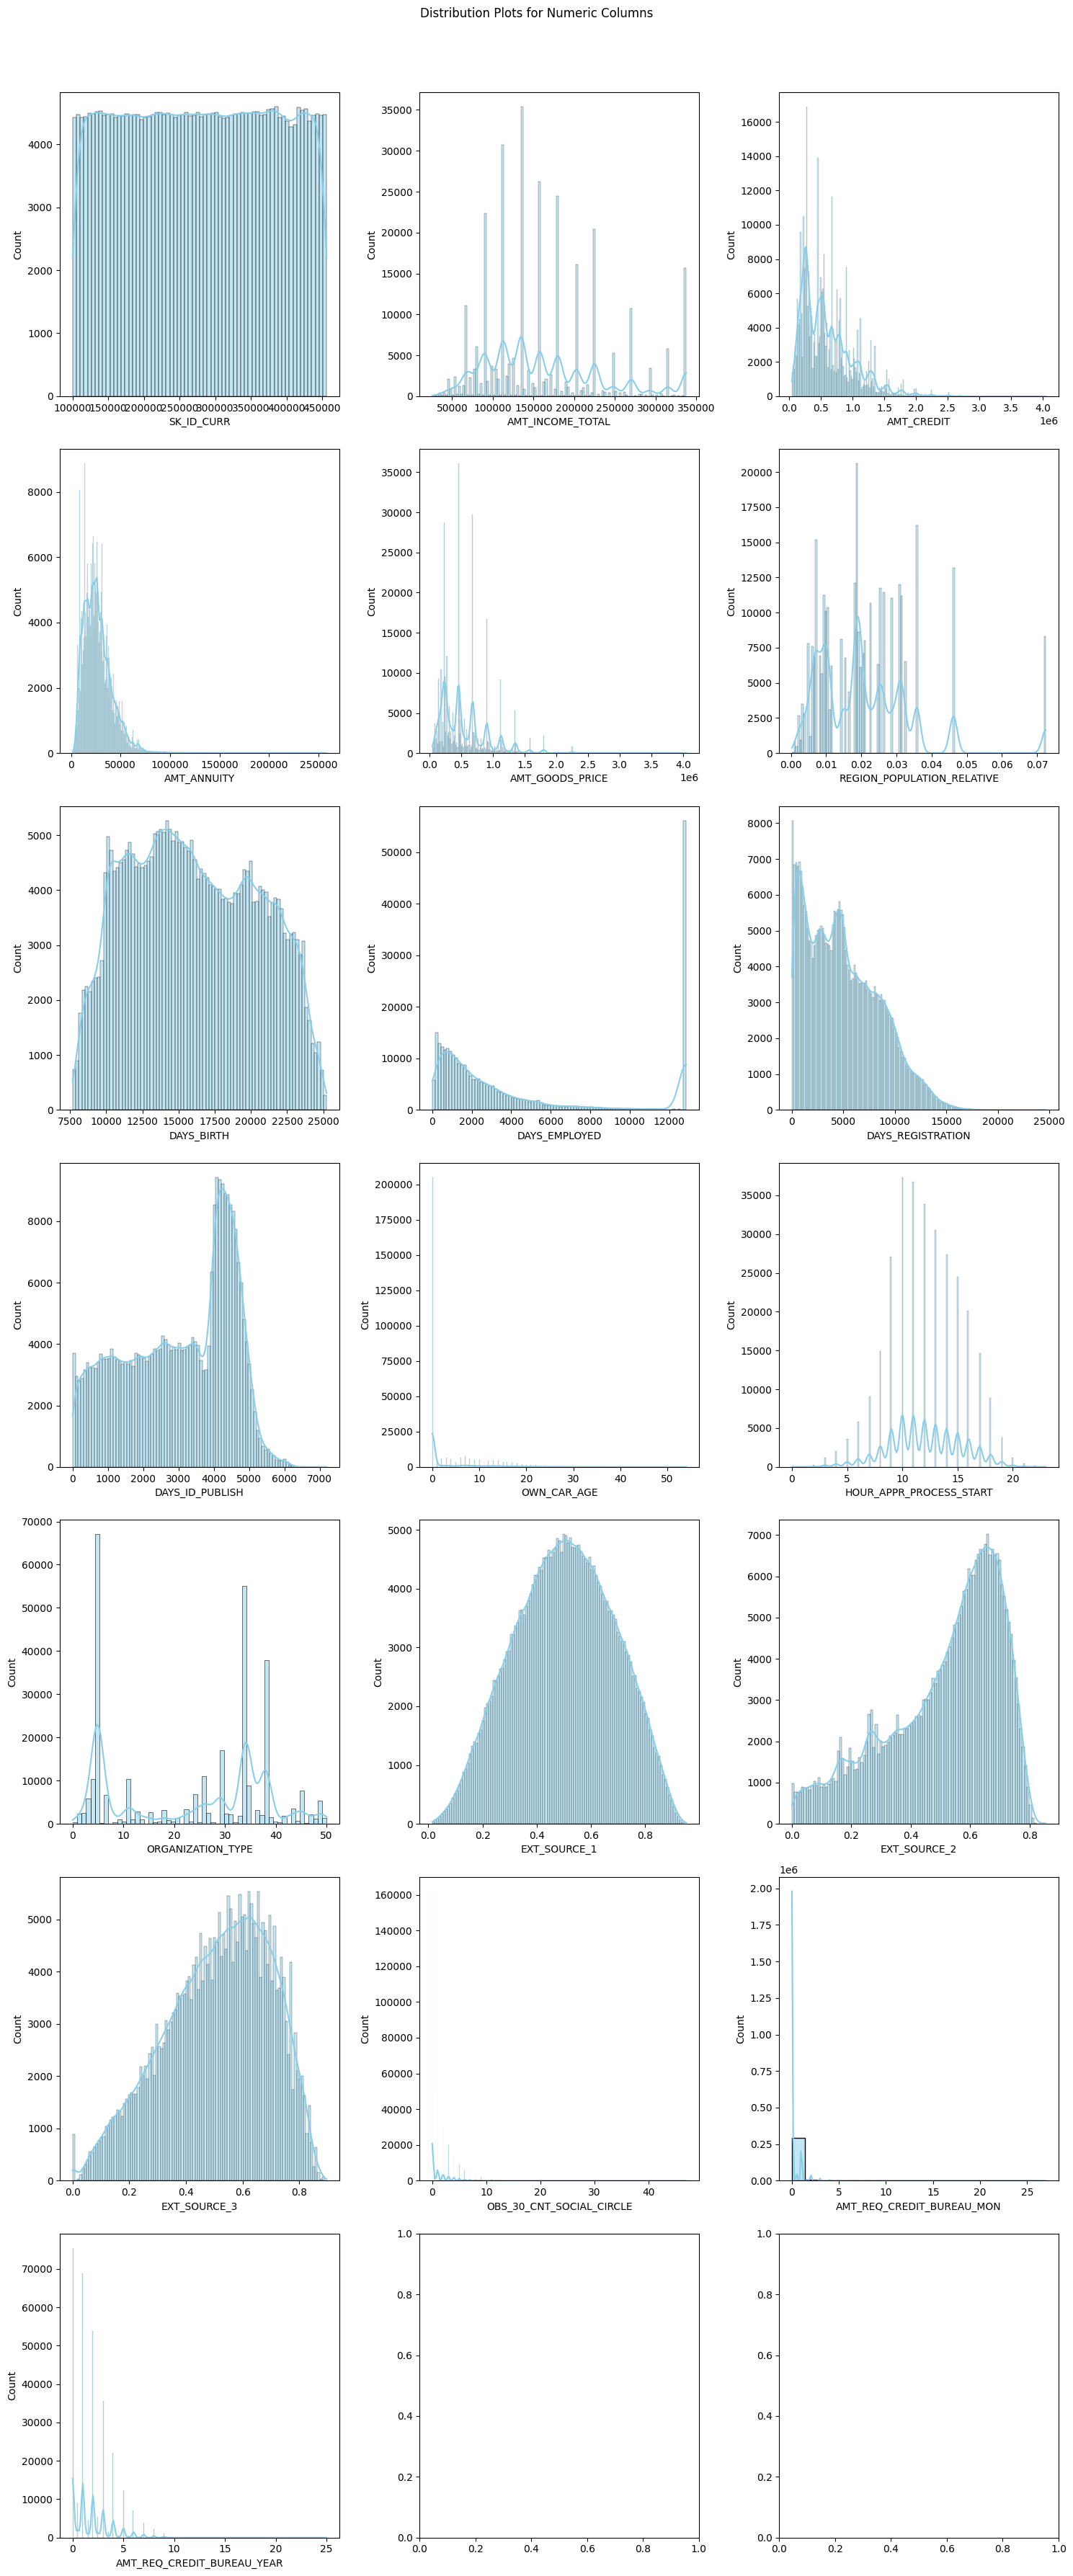

In [47]:
num_columns = df[selected_columns].shape[1]
num_rows = math.ceil(num_columns / 3)
num_cols = min(num_columns, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()
for i, column in enumerate(selected_columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i], color='skyblue')
plt.suptitle('Distribution Plots for Numeric Columns', y=1.02)
plt.tight_layout()
plt.show()

In [48]:
skew_kurt=pd.DataFrame()
skew_kurt["columns"]=selected_columns
skew_kurt["skewness"]=[df[i].skew() for i in selected_columns]
skew_kurt["Kurtosis"]=[df[i].kurt() for i in selected_columns]

In [49]:
skew_kurt

,columns,skewness,Kurtosis
0,SK_ID_CURR,-0.001119,-1.199266
1,AMT_INCOME_TOTAL,0.784625,-0.035737
2,AMT_CREDIT,1.234637,1.937191
3,AMT_ANNUITY,1.576394,7.656025
4,AMT_GOODS_PRICE,1.349648,2.439465
5,REGION_POPULATION_RELATIVE,1.491089,3.274293
6,DAYS_BIRTH,0.111284,-1.051668
7,DAYS_EMPLOYED,1.094222,-0.409081
8,DAYS_REGISTRATION,0.589719,-0.323718
9,DAYS_ID_PUBLISH,-0.352203,-1.103653


In [51]:
from scipy.stats import kendalltau

numerical_df=pd.DataFrame()
numerical_df["columns"]=selected_columns
numerical_df["p_val"]=[kendalltau(df[i], df['TARGET']).pvalue for i in selected_columns]

In [58]:
numerical_df["a/r"]=["monotonic relationship" if i<0.05 else "no monotonic relationship" for i in numerical_df["p_val"]]

In [59]:
numerical_df

,columns,p_val,a/r
0,SK_ID_CURR,3.035398e-01,no monotonic relationship
1,AMT_INCOME_TOTAL,5.721981e-23,monotonic relationship
2,AMT_CREDIT,1.951952e-22,monotonic relationship
3,AMT_ANNUITY,9.438784e-01,no monotonic relationship
4,AMT_GOODS_PRICE,3.295477e-68,monotonic relationship
5,REGION_POPULATION_RELATIVE,1.793760e-64,monotonic relationship
6,DAYS_BIRTH,0.000000e+00,monotonic relationship
7,DAYS_EMPLOYED,0.000000e+00,monotonic relationship
8,DAYS_REGISTRATION,4.476626e-110,monotonic relationship
9,DAYS_ID_PUBLISH,5.260075e-184,monotonic relationship


In [60]:
columns_to_drop=["AMT_GOODS_PRICE","SK_ID_CURR","OBS_30_CNT_SOCIAL_CIRCLE"]

df=df.drop(columns=columns_to_drop,axis=1)

In [61]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE1
0,1,0,1,1,0,202500.0,406597.5,24700.5,6,3,...,0.139376,1,0,0,0.0,0.0,0.0,0.0,1.0,8
1,0,0,0,0,0,270000.0,1293502.5,35698.5,1,2,...,0.586819,1,0,0,0.0,0.0,0.0,0.0,0.0,3
2,0,1,1,1,0,67500.0,135000.0,6750.0,6,3,...,0.729567,0,0,0,0.0,0.0,0.0,0.0,0.0,8
3,0,0,0,1,0,135000.0,312682.5,29686.5,6,3,...,0.519243,1,0,0,0.0,0.0,0.0,0.0,0.5,8
4,0,0,1,1,0,121500.0,513000.0,21865.5,6,3,...,0.581112,0,0,1,0.0,0.0,0.0,0.0,0.0,3


<Axes: >

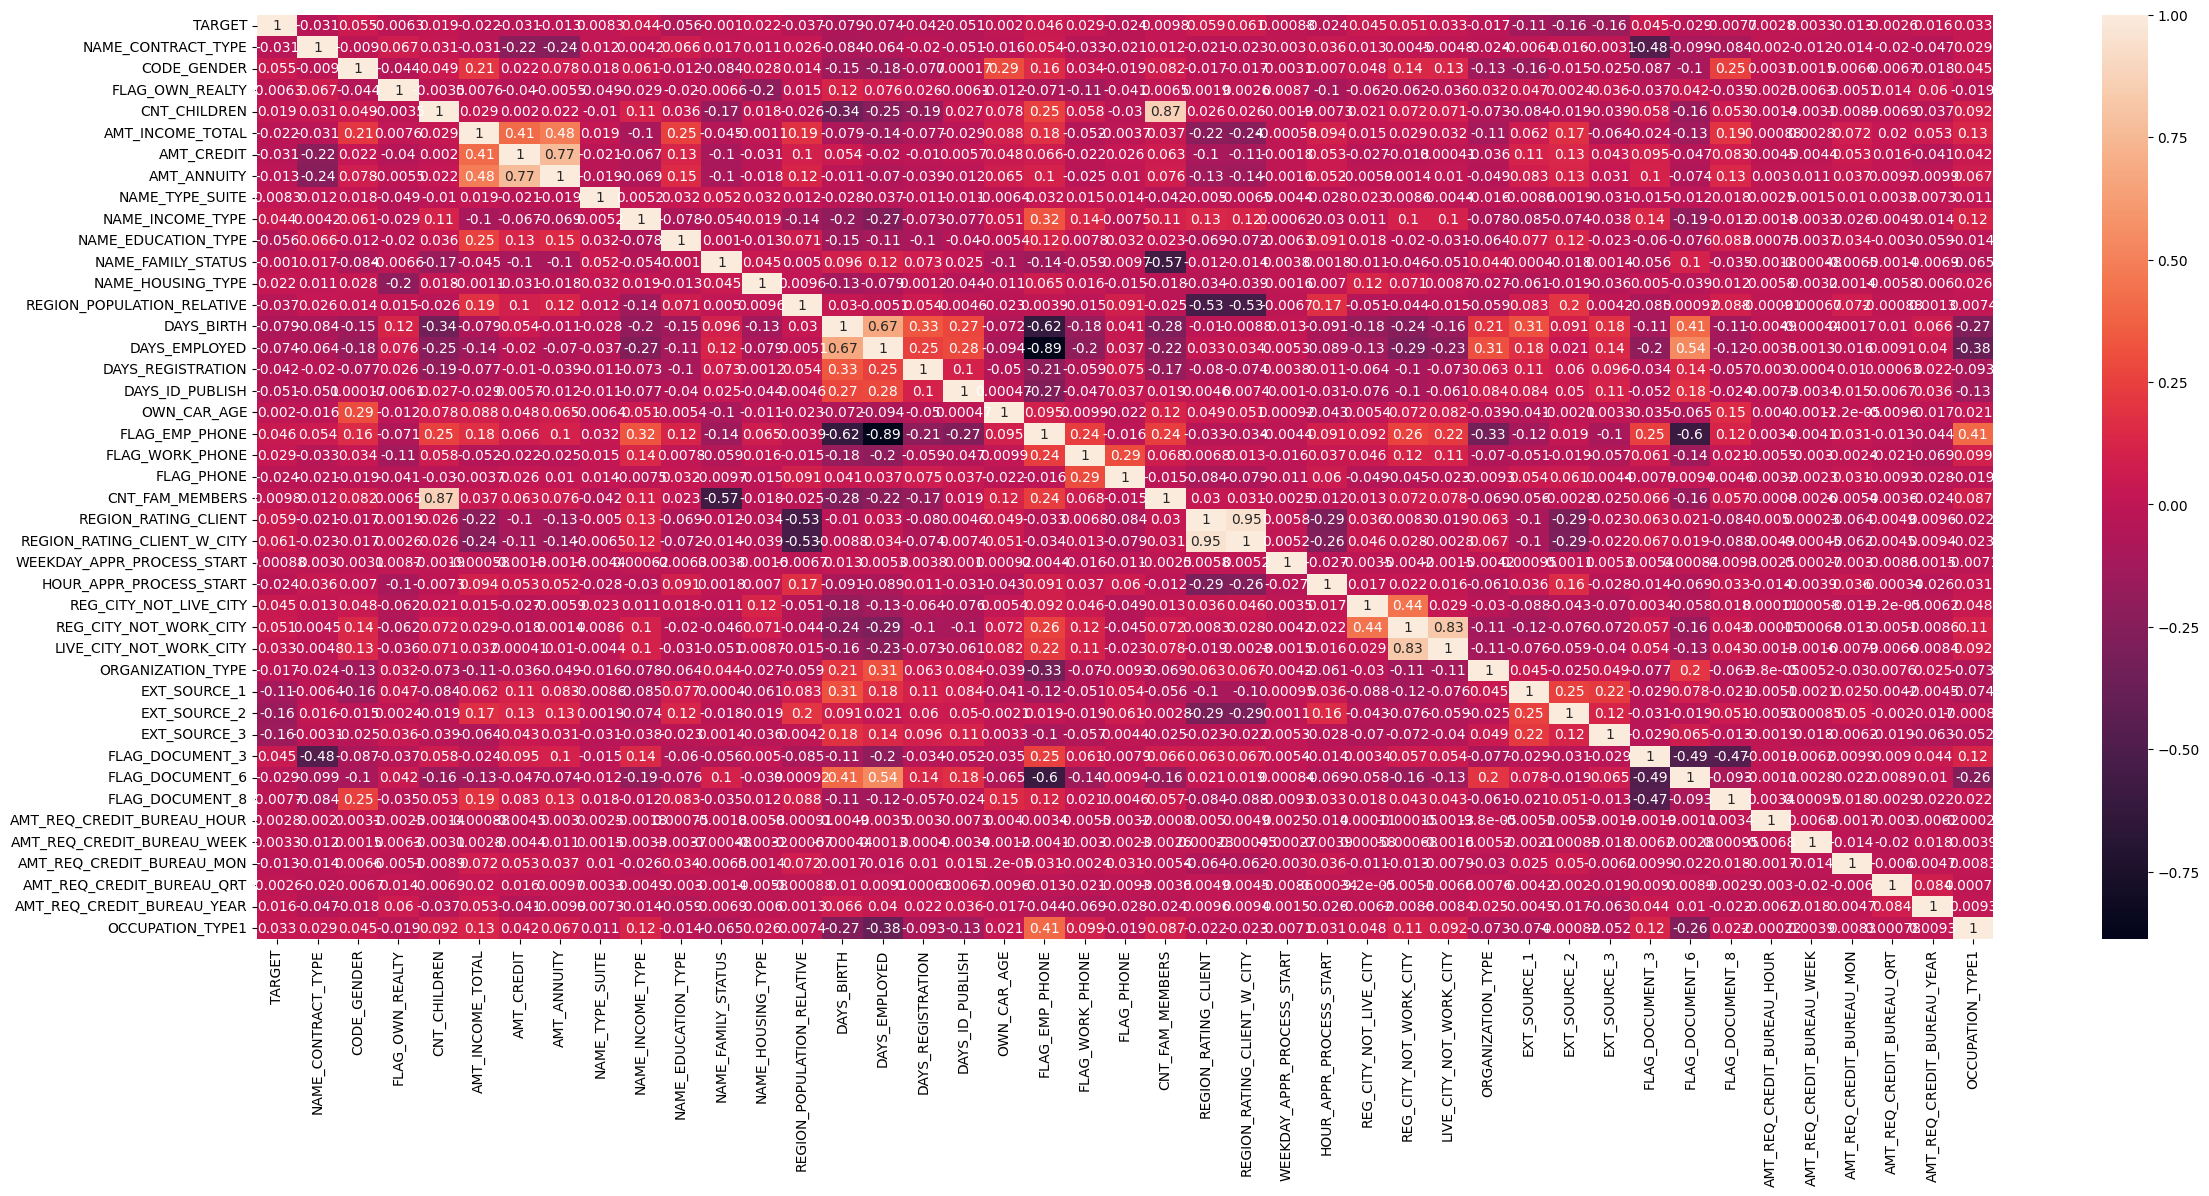

In [65]:
plt.figure(figsize=(28,12))
sns.heatmap(df.corr(),annot=True)

In [67]:
correlation_df=pd.DataFrame()
correlation_df["columns"]=df.columns

In [78]:
abs(df.corr()["TARGET"])

TARGET                         1.000000
NAME_CONTRACT_TYPE             0.031182
CODE_GENDER                    0.054794
FLAG_OWN_REALTY                0.006268
CNT_CHILDREN                   0.019190
AMT_INCOME_TOTAL               0.022294
AMT_CREDIT                     0.030518
AMT_ANNUITY                    0.012652
NAME_TYPE_SUITE                0.008344
NAME_INCOME_TYPE               0.044443
NAME_EDUCATION_TYPE            0.055744
NAME_FAMILY_STATUS             0.001007
NAME_HOUSING_TYPE              0.022260
REGION_POPULATION_RELATIVE     0.037423
DAYS_BIRTH                     0.078514
DAYS_EMPLOYED                  0.073524
DAYS_REGISTRATION              0.042239
DAYS_ID_PUBLISH                0.051432
OWN_CAR_AGE                    0.001965
FLAG_EMP_PHONE                 0.046329
FLAG_WORK_PHONE                0.028755
FLAG_PHONE                     0.023748
CNT_FAM_MEMBERS                0.009786
REGION_RATING_CLIENT           0.059236
REGION_RATING_CLIENT_W_CITY    0.061212


# DEALING WITH DAYS COLUMNS

In [81]:
columns_ending_with_days=[col for col in df.columns if col.startswith('DAYS')]

In [82]:
df[columns_ending_with_days]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648.0,2120
1,16765,1188,1186.0,291
2,19046,225,4260.0,2531
3,19005,3039,9833.0,2437
4,19932,3038,4311.0,3458
...,...,...,...,...
303942,9327,236,8456.0,1982
303943,20775,12868,4388.0,4090
303944,14966,7921,6737.0,5150
303945,11961,4786,2562.0,931


## 1. DAYS_BIRTH

In [83]:
df.DAYS_BIRTH.min()

7673

In [11]:
df.DAYS_BIRTH.max()

25229

In [84]:
days_in_a_year = 365.25
df.DAYS_BIRTH = np.floor(df.DAYS_BIRTH / days_in_a_year)

<Axes: xlabel='DAYS_BIRTH'>

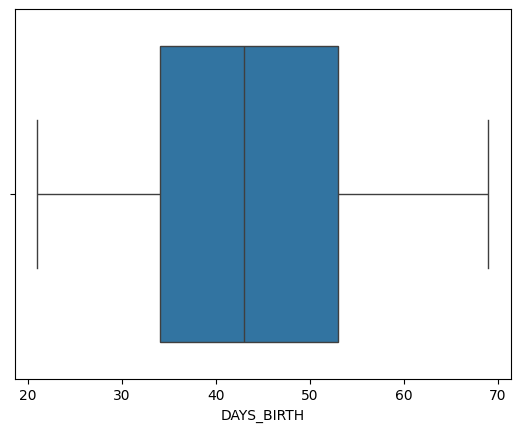

In [85]:
sns.boxplot(x=df.DAYS_BIRTH)

<Axes: xlabel='DAYS_BIRTH', ylabel='Count'>

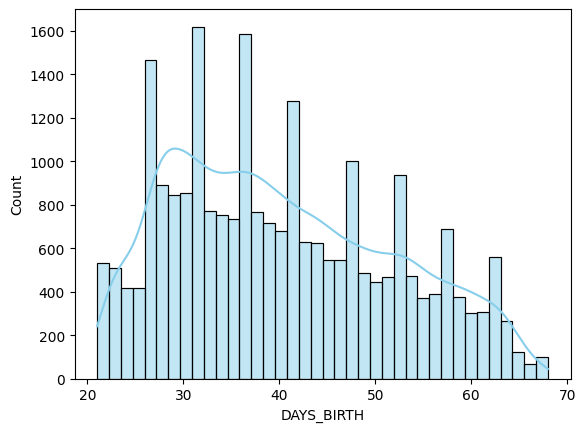

In [86]:
sns.histplot(df[df["TARGET"]==1].DAYS_BIRTH,color='skyblue', kde=True)


# most of the people opting for credit are between 25 to40

0.11164561222012365

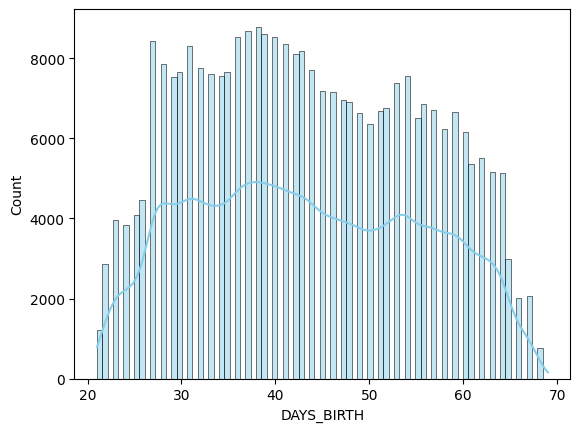

In [87]:
sns.histplot(df.DAYS_BIRTH,color='skyblue', kde=True)

df.DAYS_BIRTH.skew()

## DAYS_EMPLOYED

In [14]:
df["DAYS_EMPLOYED"].min()

0

In [15]:
df["DAYS_EMPLOYED"].max()

12868

In [32]:
df[df["DAYS_EMPLOYED"]<366].shape[0]*100/df.shape[0]

#91% of the people are having experience more than 1 year



9.074937406850536

In [88]:
days_in_a_year = 365.25
df.DAYS_EMPLOYED = np.floor(df.DAYS_EMPLOYED / days_in_a_year)

# DAYS_REGISTRATION

In [89]:
df["DAYS_REGISTRATION"].min()

0.0

In [90]:
df["DAYS_REGISTRATION"].max()

24672.0

In [91]:
days_in_a_year = 365.25
df["DAYS_REGISTRATION"] = np.floor(df["DAYS_REGISTRATION"] / days_in_a_year)

# DAYS_ID_PUBLISH

In [92]:
df["DAYS_ID_PUBLISH"].min()

0

In [93]:
df["DAYS_ID_PUBLISH"].max()

7197

In [94]:
days_in_a_year = 365.25
df["DAYS_ID_PUBLISH"]= np.floor(df["DAYS_ID_PUBLISH"] / days_in_a_year)

In [95]:
df.to_csv('/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/10_feature_extraction.csv', index=False)